# Exploratory Data Analysis

#### Import necessary packages

In [88]:
import pandas as pd
import plotly.express as px
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.static import players
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leagueleaders

#### To begin this section of the EDA, we want to combine RAPTOR data with NBA player data sourced from the NBA site using the nba_api package. First we need to tabulate all the players in the NBA from the 1976 season, as well as their seasons. Then we can proceed to assign raptor stats to each player for each season. 

In [97]:
list_of_players = players.get_players()


In [98]:
len(list_of_players)

4815

In [99]:
list_of_players[0]

{'id': 76001,
 'full_name': 'Alaa Abdelnaby',
 'first_name': 'Alaa',
 'last_name': 'Abdelnaby',
 'is_active': False}

In [111]:
player_ids = []
player_names = []
player_id_dict = {}
for p in list_of_players:
    player_ids.append(p['id'])
    player_names.append(p['full_name'])
    player_id_dict[p['full_name']] = p['id']

Proceeding to combine regular season statistics for every player(for each of their seasons)

In [116]:
rap_modern = pd.read_csv('modern_RAPTOR_by_player.csv')

In [117]:
list_of_names = rap_modern[rap_modern['mp']>=1000].drop_duplicates(subset=['player_name'])['player_name'].tolist()

In [118]:
len(list_of_names)

665

In [121]:
len(player_ids)
reg_season_list = []

In [318]:
for i in range(660,665):
    temp_career = playercareerstats.PlayerCareerStats(player_id = player_id_dict[list_of_names[i]])
    temp_df = temp_career.get_data_frames()[0]
    reg_season_list.append(temp_df)

In [319]:
len(reg_season_list)

665

In [302]:
#list_of_names[331] = 'Enes Freedom' from Enes Kanter
# Had to change OG Anunoby to O.G. Anunoby
#list_of_names[340] = 'Kevin Knox II' from Kevin Knox
#list_of_names[430] = 'Marcus Morris Sr.' from Marcus Morris
#list_of_names[600] = 'P.J. Tucker' from PJ Tucker

In [320]:
merged_df_600 = pd.DataFrame()
merged_df_665 = pd.concat(reg_season_list)

In [321]:
merged_df_665

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,203518,2016-17,00,1610612760,OKC,23.0,68,6,1055.0,134,...,0.898,18,68,86,40,37,8,33.0,114,406
1,203518,2017-18,00,1610612760,OKC,24.0,75,8,1134.0,115,...,0.848,26,88,114,28,38,8,25.0,124,353
2,203518,2018-19,00,1610612760,OKC,25.0,31,2,588.0,56,...,0.923,5,43,48,20,17,6,14.0,53,165
0,1630173,2020-21,00,1610612748,MIA,21.0,61,4,737.0,124,...,0.509,73,135,208,29,20,28,43.0,91,304
1,1630173,2021-22,00,1610612761,TOR,22.0,73,28,1725.0,265,...,0.595,146,327,473,82,37,41,84.0,151,664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1627826,2018-19,00,0,TOT,22.0,59,37,1039.0,212,...,0.802,115,247,362,63,14,51,70.0,137,525
5,1627826,2019-20,00,1610612746,LAC,23.0,72,70,1326.0,236,...,0.747,197,346,543,82,16,66,61.0,168,596
6,1627826,2020-21,00,1610612746,LAC,24.0,72,33,1609.0,257,...,0.789,189,330,519,90,24,62,81.0,187,650
7,1627826,2021-22,00,1610612746,LAC,25.0,76,76,1852.0,310,...,0.727,217,427,644,120,36,77,114.0,203,785


In [323]:
merged_df_665.to_csv('modern_regular_stats.csv', index=False)

# -------------------------------------------------------------------------------------------

#### We now have a csv of all regular season stats for all players in the modern RAPTOR dataset. Importing the csv, we can begin to add 'wins above replacement' RAPTOR stats for the regular season and the playoffs to each row of this dataset. 

In [30]:
regular_season_stats = pd.read_csv("modern_regular_stats.csv")

In [31]:
regular_season_stats

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,203518,2016-17,0,1610612760,OKC,23.0,68,6,1055.0,134,...,0.898,18,68,86,40,37,8,33.0,114,406
1,203518,2017-18,0,1610612760,OKC,24.0,75,8,1134.0,115,...,0.848,26,88,114,28,38,8,25.0,124,353
2,203518,2018-19,0,1610612760,OKC,25.0,31,2,588.0,56,...,0.923,5,43,48,20,17,6,14.0,53,165
3,1630173,2020-21,0,1610612748,MIA,21.0,61,4,737.0,124,...,0.509,73,135,208,29,20,28,43.0,91,304
4,1630173,2021-22,0,1610612761,TOR,22.0,73,28,1725.0,265,...,0.595,146,327,473,82,37,41,84.0,151,664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,1627826,2018-19,0,0,TOT,22.0,59,37,1039.0,212,...,0.802,115,247,362,63,14,51,70.0,137,525
6776,1627826,2019-20,0,1610612746,LAC,23.0,72,70,1326.0,236,...,0.747,197,346,543,82,16,66,61.0,168,596
6777,1627826,2020-21,0,1610612746,LAC,24.0,72,33,1609.0,257,...,0.789,189,330,519,90,24,62,81.0,187,650
6778,1627826,2021-22,0,1610612746,LAC,25.0,76,76,1852.0,310,...,0.727,217,427,644,120,36,77,114.0,203,785


Creating a dictionary of ids to full names

In [32]:
list_of_players = players.get_players()
player_id_name_dict = {}
for p in list_of_players:
    player_id_name_dict[p['id']] = p['full_name']

In [33]:
name_list = []
for ident in regular_season_stats['PLAYER_ID']:
    name_list.append(player_id_name_dict[ident])

In [34]:
regular_season_stats['FULL_NAME'] = name_list

In [35]:
regular_season_stats.columns

Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'FULL_NAME'],
      dtype='object')

In [36]:
regular_season_stats

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,FULL_NAME
0,203518,2016-17,0,1610612760,OKC,23.0,68,6,1055.0,134,...,18,68,86,40,37,8,33.0,114,406,Alex Abrines
1,203518,2017-18,0,1610612760,OKC,24.0,75,8,1134.0,115,...,26,88,114,28,38,8,25.0,124,353,Alex Abrines
2,203518,2018-19,0,1610612760,OKC,25.0,31,2,588.0,56,...,5,43,48,20,17,6,14.0,53,165,Alex Abrines
3,1630173,2020-21,0,1610612748,MIA,21.0,61,4,737.0,124,...,73,135,208,29,20,28,43.0,91,304,Precious Achiuwa
4,1630173,2021-22,0,1610612761,TOR,22.0,73,28,1725.0,265,...,146,327,473,82,37,41,84.0,151,664,Precious Achiuwa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,1627826,2018-19,0,0,TOT,22.0,59,37,1039.0,212,...,115,247,362,63,14,51,70.0,137,525,Ivica Zubac
6776,1627826,2019-20,0,1610612746,LAC,23.0,72,70,1326.0,236,...,197,346,543,82,16,66,61.0,168,596,Ivica Zubac
6777,1627826,2020-21,0,1610612746,LAC,24.0,72,33,1609.0,257,...,189,330,519,90,24,62,81.0,187,650,Ivica Zubac
6778,1627826,2021-22,0,1610612746,LAC,25.0,76,76,1852.0,310,...,217,427,644,120,36,77,114.0,203,785,Ivica Zubac


We now want create new columns for Points per game (PPG), Assists per game (APG), Offensive Rebounds per game (OREBPG), Defensive Rebounds per game (DREBPG), Steals per game (STLPG), Blocks per game (BLKPG), and Turnovers per game (TOVPG).

In [37]:
regular_season_stats['PPG'] = regular_season_stats['PTS']/regular_season_stats['GP']

In [38]:
regular_season_stats['APG'] = regular_season_stats['AST']/regular_season_stats['GP']
regular_season_stats['OREBPG'] = regular_season_stats['OREB']/regular_season_stats['GP']
regular_season_stats['DREBPG'] = regular_season_stats['DREB']/regular_season_stats['GP']
regular_season_stats['STLPG'] = regular_season_stats['STL']/regular_season_stats['GP']
regular_season_stats['BLKPG'] = regular_season_stats['BLK']/regular_season_stats['GP']
regular_season_stats['TOVPG'] = regular_season_stats['TOV']/regular_season_stats['GP']

In [39]:
regular_season_stats

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,PF,PTS,FULL_NAME,PPG,APG,OREBPG,DREBPG,STLPG,BLKPG,TOVPG
0,203518,2016-17,0,1610612760,OKC,23.0,68,6,1055.0,134,...,114,406,Alex Abrines,5.970588,0.588235,0.264706,1.000000,0.544118,0.117647,0.485294
1,203518,2017-18,0,1610612760,OKC,24.0,75,8,1134.0,115,...,124,353,Alex Abrines,4.706667,0.373333,0.346667,1.173333,0.506667,0.106667,0.333333
2,203518,2018-19,0,1610612760,OKC,25.0,31,2,588.0,56,...,53,165,Alex Abrines,5.322581,0.645161,0.161290,1.387097,0.548387,0.193548,0.451613
3,1630173,2020-21,0,1610612748,MIA,21.0,61,4,737.0,124,...,91,304,Precious Achiuwa,4.983607,0.475410,1.196721,2.213115,0.327869,0.459016,0.704918
4,1630173,2021-22,0,1610612761,TOR,22.0,73,28,1725.0,265,...,151,664,Precious Achiuwa,9.095890,1.123288,2.000000,4.479452,0.506849,0.561644,1.150685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,1627826,2018-19,0,0,TOT,22.0,59,37,1039.0,212,...,137,525,Ivica Zubac,8.898305,1.067797,1.949153,4.186441,0.237288,0.864407,1.186441
6776,1627826,2019-20,0,1610612746,LAC,23.0,72,70,1326.0,236,...,168,596,Ivica Zubac,8.277778,1.138889,2.736111,4.805556,0.222222,0.916667,0.847222
6777,1627826,2020-21,0,1610612746,LAC,24.0,72,33,1609.0,257,...,187,650,Ivica Zubac,9.027778,1.250000,2.625000,4.583333,0.333333,0.861111,1.125000
6778,1627826,2021-22,0,1610612746,LAC,25.0,76,76,1852.0,310,...,203,785,Ivica Zubac,10.328947,1.578947,2.855263,5.618421,0.473684,1.013158,1.500000


In [40]:
del regular_season_stats['LEAGUE_ID']

In [41]:
regular_season_stats.columns

Index(['PLAYER_ID', 'SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'PLAYER_AGE',
       'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT',
       'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'FULL_NAME', 'PPG', 'APG', 'OREBPG', 'DREBPG',
       'STLPG', 'BLKPG', 'TOVPG'],
      dtype='object')

Now deleting all the columns that we would not need

In [42]:
regular_season_stats = regular_season_stats.drop(['GS', 'FGM', 'FGA', 'FG3M', 
                                                  'FG3A', 'FTM', 'FTA', 'OREB', 
                                                  'DREB', 'REB', 'AST', 'STL', 
                                                  'BLK', 'TOV', 'PF', 'PTS'], axis=1)

In [43]:
regular_season_stats

,PLAYER_ID,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,MIN,FG_PCT,FG3_PCT,FT_PCT,FULL_NAME,PPG,APG,OREBPG,DREBPG,STLPG,BLKPG,TOVPG
0,203518,2016-17,1610612760,OKC,23.0,68,1055.0,0.393,0.381,0.898,Alex Abrines,5.970588,0.588235,0.264706,1.000000,0.544118,0.117647,0.485294
1,203518,2017-18,1610612760,OKC,24.0,75,1134.0,0.395,0.380,0.848,Alex Abrines,4.706667,0.373333,0.346667,1.173333,0.506667,0.106667,0.333333
2,203518,2018-19,1610612760,OKC,25.0,31,588.0,0.357,0.323,0.923,Alex Abrines,5.322581,0.645161,0.161290,1.387097,0.548387,0.193548,0.451613
3,1630173,2020-21,1610612748,MIA,21.0,61,737.0,0.544,0.000,0.509,Precious Achiuwa,4.983607,0.475410,1.196721,2.213115,0.327869,0.459016,0.704918
4,1630173,2021-22,1610612761,TOR,22.0,73,1725.0,0.439,0.359,0.595,Precious Achiuwa,9.095890,1.123288,2.000000,4.479452,0.506849,0.561644,1.150685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,1627826,2018-19,0,TOT,22.0,59,1039.0,0.559,0.000,0.802,Ivica Zubac,8.898305,1.067797,1.949153,4.186441,0.237288,0.864407,1.186441
6776,1627826,2019-20,1610612746,LAC,23.0,72,1326.0,0.613,0.000,0.747,Ivica Zubac,8.277778,1.138889,2.736111,4.805556,0.222222,0.916667,0.847222
6777,1627826,2020-21,1610612746,LAC,24.0,72,1609.0,0.652,0.250,0.789,Ivica Zubac,9.027778,1.250000,2.625000,4.583333,0.333333,0.861111,1.125000
6778,1627826,2021-22,1610612746,LAC,25.0,76,1852.0,0.626,0.000,0.727,Ivica Zubac,10.328947,1.578947,2.855263,5.618421,0.473684,1.013158,1.500000


Reordering the columns to make it easier to read

In [45]:
regular_season_stats.insert(0, 'FULL_NAME', regular_season_stats.pop('FULL_NAME'))

In [46]:
regular_season_stats

,FULL_NAME,PLAYER_ID,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,MIN,FG_PCT,FG3_PCT,FT_PCT,PPG,APG,OREBPG,DREBPG,STLPG,BLKPG,TOVPG
0,Alex Abrines,203518,2016-17,1610612760,OKC,23.0,68,1055.0,0.393,0.381,0.898,5.970588,0.588235,0.264706,1.000000,0.544118,0.117647,0.485294
1,Alex Abrines,203518,2017-18,1610612760,OKC,24.0,75,1134.0,0.395,0.380,0.848,4.706667,0.373333,0.346667,1.173333,0.506667,0.106667,0.333333
2,Alex Abrines,203518,2018-19,1610612760,OKC,25.0,31,588.0,0.357,0.323,0.923,5.322581,0.645161,0.161290,1.387097,0.548387,0.193548,0.451613
3,Precious Achiuwa,1630173,2020-21,1610612748,MIA,21.0,61,737.0,0.544,0.000,0.509,4.983607,0.475410,1.196721,2.213115,0.327869,0.459016,0.704918
4,Precious Achiuwa,1630173,2021-22,1610612761,TOR,22.0,73,1725.0,0.439,0.359,0.595,9.095890,1.123288,2.000000,4.479452,0.506849,0.561644,1.150685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,Ivica Zubac,1627826,2018-19,0,TOT,22.0,59,1039.0,0.559,0.000,0.802,8.898305,1.067797,1.949153,4.186441,0.237288,0.864407,1.186441
6776,Ivica Zubac,1627826,2019-20,1610612746,LAC,23.0,72,1326.0,0.613,0.000,0.747,8.277778,1.138889,2.736111,4.805556,0.222222,0.916667,0.847222
6777,Ivica Zubac,1627826,2020-21,1610612746,LAC,24.0,72,1609.0,0.652,0.250,0.789,9.027778,1.250000,2.625000,4.583333,0.333333,0.861111,1.125000
6778,Ivica Zubac,1627826,2021-22,1610612746,LAC,25.0,76,1852.0,0.626,0.000,0.727,10.328947,1.578947,2.855263,5.618421,0.473684,1.013158,1.500000


Saving the new dataframe as a csv for later use

In [79]:
regular_season_stats.to_csv('regular_season_stats_mod.csv', index = False)

In [48]:
rap_modern = pd.read_csv('modern_RAPTOR_by_player.csv')
rap_modern

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alex Abrines,abrinal01,2017,2387,1135,0.745505,-0.372938,0.372567,-0.418553,-3.857011,...,0.543421,-1.144832,-0.601411,1.249008,1.447708,-0.198700,0.077102,-1.038677,-0.961575,0.326413
1,Alex Abrines,abrinal01,2018,2546,1244,0.317549,-1.725325,-1.407776,-1.291727,-0.049694,...,-0.020826,-1.502642,-1.523468,0.777304,0.465912,0.311392,-0.174621,-1.112625,-1.287247,-0.456141
2,Alex Abrines,abrinal01,2019,1279,588,-3.215683,1.078399,-2.137285,-6.158856,4.901168,...,-4.040157,1.885618,-2.154538,0.178167,0.178167,0.000000,-4.577678,1.543282,-3.034396,-0.268013
3,Precious Achiuwa,achiupr01,2021,1581,749,-4.122966,1.359278,-2.763688,-4.050779,-0.919712,...,-4.347596,0.954821,-3.392775,-0.246055,-0.246776,0.000721,-3.817713,0.474828,-3.342885,0.329157
4,Precious Achiuwa,achiupr01,2022,3802,1892,-2.521510,1.763502,-0.758008,-1.687893,3.103441,...,-2.517372,2.144151,-0.373221,2.262658,2.309611,-0.046953,-2.483956,2.024360,-0.459596,-0.728609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,Ivica Zubac,zubaciv01,2018,871,410,-2.581325,1.643240,-0.938084,-3.444739,6.249652,...,-2.903709,2.688832,-0.214877,0.531968,0.531968,0.000000,-2.616331,0.752875,-1.863456,0.311576
4681,Ivica Zubac,zubaciv01,2019,2345,1079,-2.336006,1.400274,-0.935733,-1.757992,3.051059,...,-2.362444,1.813768,-0.548676,1.217134,1.114995,0.102138,-2.810283,1.157824,-1.652459,0.077074
4682,Ivica Zubac,zubaciv01,2020,3447,1646,0.516422,3.529428,4.045850,3.314971,2.963001,...,1.099849,3.549458,4.649308,6.224207,5.020903,1.203304,-0.310842,3.331974,3.021132,-0.410164
4683,Ivica Zubac,zubaciv01,2021,3908,1910,-0.371753,2.960613,2.588860,-2.541995,0.156338,...,-0.909039,2.525735,1.616696,4.261327,3.704630,0.556697,-0.874338,2.280011,1.405673,-0.117623


Now let's look at how we can add the 'war' RAPTOR stat for the regular and season and the playoffs for each player. For each player in the regular_season_stats dataset, we want to add their respective 'war_reg_season' and 'war_playoffs'. We can search for the players respective RAPTOR stat by searching the 'rap_modern' dataset using 'FULL_NAME' and 'SEASON_ID'. First, we need to convert 'SEASON_ID' into an int with the single year format (e.g. from '2016-17' to 2016)

In [50]:
exp_str = '2016-17'
year = int(exp_str[:4])
year

2016

In [52]:
years = []
for y in regular_season_stats['SEASON_ID']:
    years.append(int(y[:4]))

In [54]:
regular_season_stats.insert(2, 'SEASON', years)

In [56]:
del regular_season_stats['SEASON_ID']

In [57]:
regular_season_stats

,FULL_NAME,PLAYER_ID,SEASON,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,MIN,FG_PCT,FG3_PCT,FT_PCT,PPG,APG,OREBPG,DREBPG,STLPG,BLKPG,TOVPG
0,Alex Abrines,203518,2016,1610612760,OKC,23.0,68,1055.0,0.393,0.381,0.898,5.970588,0.588235,0.264706,1.000000,0.544118,0.117647,0.485294
1,Alex Abrines,203518,2017,1610612760,OKC,24.0,75,1134.0,0.395,0.380,0.848,4.706667,0.373333,0.346667,1.173333,0.506667,0.106667,0.333333
2,Alex Abrines,203518,2018,1610612760,OKC,25.0,31,588.0,0.357,0.323,0.923,5.322581,0.645161,0.161290,1.387097,0.548387,0.193548,0.451613
3,Precious Achiuwa,1630173,2020,1610612748,MIA,21.0,61,737.0,0.544,0.000,0.509,4.983607,0.475410,1.196721,2.213115,0.327869,0.459016,0.704918
4,Precious Achiuwa,1630173,2021,1610612761,TOR,22.0,73,1725.0,0.439,0.359,0.595,9.095890,1.123288,2.000000,4.479452,0.506849,0.561644,1.150685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,Ivica Zubac,1627826,2018,0,TOT,22.0,59,1039.0,0.559,0.000,0.802,8.898305,1.067797,1.949153,4.186441,0.237288,0.864407,1.186441
6776,Ivica Zubac,1627826,2019,1610612746,LAC,23.0,72,1326.0,0.613,0.000,0.747,8.277778,1.138889,2.736111,4.805556,0.222222,0.916667,0.847222
6777,Ivica Zubac,1627826,2020,1610612746,LAC,24.0,72,1609.0,0.652,0.250,0.789,9.027778,1.250000,2.625000,4.583333,0.333333,0.861111,1.125000
6778,Ivica Zubac,1627826,2021,1610612746,LAC,25.0,76,1852.0,0.626,0.000,0.727,10.328947,1.578947,2.855263,5.618421,0.473684,1.013158,1.500000


Upon scrolling up to the section where the regular_season_stats dataframe was being assimilated, it was noticed that a few full names in the rap_modern dataframe were slightly incorrect. Populating the regular_season_stat dataframe with RAPTOR stats would be interrupted by slight name changes. As the name differences have been kept track of above, the necessary changes can be made in the rap_modern dataframe. 

In [58]:
#list_of_names[331] = 'Enes Freedom' from Enes Kanter
# Had to change OG Anunoby to O.G. Anunoby
#list_of_names[340] = 'Kevin Knox II' from Kevin Knox
#list_of_names[430] = 'Marcus Morris Sr.' from Marcus Morris
#list_of_names[600] = 'P.J. Tucker' from PJ Tucker

In [61]:
rap_modern['player_name'] = rap_modern['player_name'].replace('Enes Kanter', 'Enes Freedom')
rap_modern['player_name'] = rap_modern['player_name'].replace('OG Anunoby', 'O.G. Anunoby')
rap_modern['player_name'] = rap_modern['player_name'].replace('Kevin Knox', 'Kevin Knox II')
rap_modern['player_name'] = rap_modern['player_name'].replace('Marcus Morris', 'Marcus Morris Sr.')
rap_modern['player_name'] = rap_modern['player_name'].replace('PJ Tucker', 'P.J. Tucker')

In [64]:
rap_modern[rap_modern['player_name']=='Enes Freedom']

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
2382,Enes Freedom,kanteen01,2014,4136,2138,-3.045494,-1.796736,-4.842230,-2.917159,-3.951843,...,-3.154784,-2.292582,-5.447366,-2.917464,-2.917464,0.000000,-3.164000,-1.930351,-5.094352,-0.809842
2383,Enes Freedom,kanteen01,2015,4210,2135,-0.057597,-0.749248,-0.806845,2.515448,-5.042945,...,0.480713,-1.698082,-1.217369,1.573359,1.573359,0.000000,0.607076,-0.894568,-0.287491,-0.206042
2384,Enes Freedom,kanteen01,2016,4149,2044,3.129517,0.497602,3.627119,-0.218940,-2.973364,...,2.504947,-0.227423,2.277524,5.212302,4.618079,0.594223,3.056855,-0.378493,2.678363,-0.819057
2385,Enes Freedom,kanteen01,2017,3240,1578,1.539305,-0.174973,1.364332,1.929721,-3.540879,...,1.736697,-0.917474,0.819222,2.872921,3.070933,-0.198011,1.285082,-0.852844,0.432238,-0.242036
2386,Enes Freedom,kanteen01,2018,3735,1830,2.082297,-1.371132,0.711164,1.544990,-4.840023,...,2.115169,-2.156037,-0.040868,2.520008,2.520008,0.000000,1.568489,-1.569986,-0.001497,-0.369282
2387,Enes Freedom,kanteen01,2019,4362,2101,0.807871,-0.543977,0.263894,0.026699,-1.298943,...,0.715626,-0.707603,0.008023,3.014779,1.605334,1.409446,0.162537,-0.399690,-0.237152,-0.586824
2388,Enes Freedom,kanteen01,2020,2266,1085,1.136162,0.543030,1.679192,3.904585,-0.603408,...,1.742993,0.255038,1.998031,2.596968,2.794690,-0.197722,0.488698,0.083155,0.571853,-0.558652
2389,Enes Freedom,kanteen01,2021,3727,1814,1.981250,-2.275327,-0.294077,4.120736,-4.331347,...,2.485411,-2.798713,-0.313302,2.167282,2.966182,-0.798900,1.816571,-2.072785,-0.256215,-1.175961
2390,Enes Freedom,kanteen01,2022,844,411,-1.297013,2.829146,1.532133,0.907752,0.744268,...,-0.934198,2.429083,1.494885,0.884087,0.884087,0.000000,-1.707987,1.746863,0.038876,-0.677683


In [65]:
regular_season_stats[regular_season_stats['FULL_NAME']=='Enes Freedom']

,FULL_NAME,PLAYER_ID,SEASON,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,MIN,FG_PCT,FG3_PCT,FT_PCT,PPG,APG,OREBPG,DREBPG,STLPG,BLKPG,TOVPG
3564,Enes Freedom,202683,2011,1610612762,UTA,20.0,66,874.0,0.496,0.000,0.667,4.606061,0.121212,1.621212,2.590909,0.272727,0.348485,0.818182
3565,Enes Freedom,202683,2012,1610612762,UTA,21.0,70,1078.0,0.544,1.000,0.795,7.228571,0.442857,1.928571,2.414286,0.400000,0.457143,1.442857
3566,Enes Freedom,202683,2013,1610612762,UTA,22.0,80,2138.0,0.491,0.000,0.730,12.337500,0.937500,2.775000,4.700000,0.350000,0.525000,1.800000
3567,Enes Freedom,202683,2014,1610612762,UTA,23.0,49,1326.0,0.491,0.317,0.788,13.836735,0.530612,3.000000,4.836735,0.469388,0.326531,1.897959
3568,Enes Freedom,202683,2014,1610612760,OKC,23.0,26,809.0,0.566,0.750,0.776,18.653846,1.115385,5.000000,6.038462,0.500000,0.500000,2.000000
3569,Enes Freedom,202683,2014,0,TOT,23.0,75,2136.0,0.519,0.356,0.782,15.506667,0.733333,3.693333,5.253333,0.480000,0.386667,1.933333
3570,Enes Freedom,202683,2015,1610612760,OKC,24.0,82,1721.0,0.576,0.476,0.797,12.658537,0.402439,3.036585,5.060976,0.317073,0.402439,1.402439
3571,Enes Freedom,202683,2016,1610612760,OKC,25.0,72,1533.0,0.545,0.132,0.786,14.347222,0.930556,2.708333,3.986111,0.444444,0.527778,1.708333
3572,Enes Freedom,202683,2017,1610612752,NYK,26.0,71,1830.0,0.592,0.000,0.848,14.084507,1.478873,3.845070,7.140845,0.507042,0.521127,1.718310
3573,Enes Freedom,202683,2018,1610612752,NYK,27.0,44,1128.0,0.536,0.318,0.814,13.954545,1.909091,3.886364,6.590909,0.409091,0.386364,1.795455


It is noticed that rap_modern and regular_season_stats have unequal number of rows because rap_modern has player seasons from 2014 onwards whereas regular_season_stats has player seasons from when they first started (possible before 2014), as seen in the above example with 'Enes Freedom'. Dropping all rows in regular_season_stats that have records prior to 2014

In [66]:
regular_season_stats = regular_season_stats.drop(
    regular_season_stats[regular_season_stats['SEASON']<2014].index)

In [67]:
regular_season_stats

,FULL_NAME,PLAYER_ID,SEASON,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,MIN,FG_PCT,FG3_PCT,FT_PCT,PPG,APG,OREBPG,DREBPG,STLPG,BLKPG,TOVPG
0,Alex Abrines,203518,2016,1610612760,OKC,23.0,68,1055.0,0.393,0.381,0.898,5.970588,0.588235,0.264706,1.000000,0.544118,0.117647,0.485294
1,Alex Abrines,203518,2017,1610612760,OKC,24.0,75,1134.0,0.395,0.380,0.848,4.706667,0.373333,0.346667,1.173333,0.506667,0.106667,0.333333
2,Alex Abrines,203518,2018,1610612760,OKC,25.0,31,588.0,0.357,0.323,0.923,5.322581,0.645161,0.161290,1.387097,0.548387,0.193548,0.451613
3,Precious Achiuwa,1630173,2020,1610612748,MIA,21.0,61,737.0,0.544,0.000,0.509,4.983607,0.475410,1.196721,2.213115,0.327869,0.459016,0.704918
4,Precious Achiuwa,1630173,2021,1610612761,TOR,22.0,73,1725.0,0.439,0.359,0.595,9.095890,1.123288,2.000000,4.479452,0.506849,0.561644,1.150685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6775,Ivica Zubac,1627826,2018,0,TOT,22.0,59,1039.0,0.559,0.000,0.802,8.898305,1.067797,1.949153,4.186441,0.237288,0.864407,1.186441
6776,Ivica Zubac,1627826,2019,1610612746,LAC,23.0,72,1326.0,0.613,0.000,0.747,8.277778,1.138889,2.736111,4.805556,0.222222,0.916667,0.847222
6777,Ivica Zubac,1627826,2020,1610612746,LAC,24.0,72,1609.0,0.652,0.250,0.789,9.027778,1.250000,2.625000,4.583333,0.333333,0.861111,1.125000
6778,Ivica Zubac,1627826,2021,1610612746,LAC,25.0,76,1852.0,0.626,0.000,0.727,10.328947,1.578947,2.855263,5.618421,0.473684,1.013158,1.500000


In [75]:
stat_merge = regular_season_stats.merge(rap_modern[['player_name', 'season', 'war_reg_season', 'war_playoffs']], 
                                        left_on = ['FULL_NAME', 'SEASON'],
                                       right_on = ['player_name', 'season'], how = 'left')

In [76]:
stat_merge

,FULL_NAME,PLAYER_ID,SEASON,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,MIN,FG_PCT,FG3_PCT,...,APG,OREBPG,DREBPG,STLPG,BLKPG,TOVPG,player_name,season,war_reg_season,war_playoffs
0,Alex Abrines,203518,2016,1610612760,OKC,23.0,68,1055.0,0.393,0.381,...,0.588235,0.264706,1.000000,0.544118,0.117647,0.485294,NaN,NaN,NaN,NaN
1,Alex Abrines,203518,2017,1610612760,OKC,24.0,75,1134.0,0.395,0.380,...,0.373333,0.346667,1.173333,0.506667,0.106667,0.333333,Alex Abrines,2017.0,1.447708,-0.198700
2,Alex Abrines,203518,2018,1610612760,OKC,25.0,31,588.0,0.357,0.323,...,0.645161,0.161290,1.387097,0.548387,0.193548,0.451613,Alex Abrines,2018.0,0.465912,0.311392
3,Precious Achiuwa,1630173,2020,1610612748,MIA,21.0,61,737.0,0.544,0.000,...,0.475410,1.196721,2.213115,0.327869,0.459016,0.704918,NaN,NaN,NaN,NaN
4,Precious Achiuwa,1630173,2021,1610612761,TOR,22.0,73,1725.0,0.439,0.359,...,1.123288,2.000000,4.479452,0.506849,0.561644,1.150685,Precious Achiuwa,2021.0,-0.246776,0.000721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4488,Ivica Zubac,1627826,2018,0,TOT,22.0,59,1039.0,0.559,0.000,...,1.067797,1.949153,4.186441,0.237288,0.864407,1.186441,Ivica Zubac,2018.0,0.531968,0.000000
4489,Ivica Zubac,1627826,2019,1610612746,LAC,23.0,72,1326.0,0.613,0.000,...,1.138889,2.736111,4.805556,0.222222,0.916667,0.847222,Ivica Zubac,2019.0,1.114995,0.102138
4490,Ivica Zubac,1627826,2020,1610612746,LAC,24.0,72,1609.0,0.652,0.250,...,1.250000,2.625000,4.583333,0.333333,0.861111,1.125000,Ivica Zubac,2020.0,5.020903,1.203304
4491,Ivica Zubac,1627826,2021,1610612746,LAC,25.0,76,1852.0,0.626,0.000,...,1.578947,2.855263,5.618421,0.473684,1.013158,1.500000,Ivica Zubac,2021.0,3.704630,0.556697


In [80]:
stat_merge = stat_merge.dropna()

In [81]:
stat_merge

,FULL_NAME,PLAYER_ID,SEASON,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,MIN,FG_PCT,FG3_PCT,...,APG,OREBPG,DREBPG,STLPG,BLKPG,TOVPG,player_name,season,war_reg_season,war_playoffs
1,Alex Abrines,203518,2017,1610612760,OKC,24.0,75,1134.0,0.395,0.380,...,0.373333,0.346667,1.173333,0.506667,0.106667,0.333333,Alex Abrines,2017.0,1.447708,-0.198700
2,Alex Abrines,203518,2018,1610612760,OKC,25.0,31,588.0,0.357,0.323,...,0.645161,0.161290,1.387097,0.548387,0.193548,0.451613,Alex Abrines,2018.0,0.465912,0.311392
4,Precious Achiuwa,1630173,2021,1610612761,TOR,22.0,73,1725.0,0.439,0.359,...,1.123288,2.000000,4.479452,0.506849,0.561644,1.150685,Precious Achiuwa,2021.0,-0.246776,0.000721
5,Precious Achiuwa,1630173,2022,1610612761,TOR,23.0,55,1141.0,0.485,0.269,...,0.909091,1.818182,4.145455,0.563636,0.545455,1.072727,Precious Achiuwa,2022.0,2.309611,-0.046953
6,Quincy Acy,203112,2014,1610612752,NYK,24.0,68,1287.0,0.459,0.300,...,1.000000,1.161765,3.264706,0.397059,0.323529,0.882353,Quincy Acy,2014.0,0.415918,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4488,Ivica Zubac,1627826,2018,0,TOT,22.0,59,1039.0,0.559,0.000,...,1.067797,1.949153,4.186441,0.237288,0.864407,1.186441,Ivica Zubac,2018.0,0.531968,0.000000
4489,Ivica Zubac,1627826,2019,1610612746,LAC,23.0,72,1326.0,0.613,0.000,...,1.138889,2.736111,4.805556,0.222222,0.916667,0.847222,Ivica Zubac,2019.0,1.114995,0.102138
4490,Ivica Zubac,1627826,2020,1610612746,LAC,24.0,72,1609.0,0.652,0.250,...,1.250000,2.625000,4.583333,0.333333,0.861111,1.125000,Ivica Zubac,2020.0,5.020903,1.203304
4491,Ivica Zubac,1627826,2021,1610612746,LAC,25.0,76,1852.0,0.626,0.000,...,1.578947,2.855263,5.618421,0.473684,1.013158,1.500000,Ivica Zubac,2021.0,3.704630,0.556697


In [82]:
del stat_merge['season']
del stat_merge['player_name']

In [83]:
stat_merge

,FULL_NAME,PLAYER_ID,SEASON,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,MIN,FG_PCT,FG3_PCT,FT_PCT,PPG,APG,OREBPG,DREBPG,STLPG,BLKPG,TOVPG,war_reg_season,war_playoffs
1,Alex Abrines,203518,2017,1610612760,OKC,24.0,75,1134.0,0.395,0.380,0.848,4.706667,0.373333,0.346667,1.173333,0.506667,0.106667,0.333333,1.447708,-0.198700
2,Alex Abrines,203518,2018,1610612760,OKC,25.0,31,588.0,0.357,0.323,0.923,5.322581,0.645161,0.161290,1.387097,0.548387,0.193548,0.451613,0.465912,0.311392
4,Precious Achiuwa,1630173,2021,1610612761,TOR,22.0,73,1725.0,0.439,0.359,0.595,9.095890,1.123288,2.000000,4.479452,0.506849,0.561644,1.150685,-0.246776,0.000721
5,Precious Achiuwa,1630173,2022,1610612761,TOR,23.0,55,1141.0,0.485,0.269,0.702,9.236364,0.909091,1.818182,4.145455,0.563636,0.545455,1.072727,2.309611,-0.046953
6,Quincy Acy,203112,2014,1610612752,NYK,24.0,68,1287.0,0.459,0.300,0.784,5.852941,1.000000,1.161765,3.264706,0.397059,0.323529,0.882353,0.415918,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4488,Ivica Zubac,1627826,2018,0,TOT,22.0,59,1039.0,0.559,0.000,0.802,8.898305,1.067797,1.949153,4.186441,0.237288,0.864407,1.186441,0.531968,0.000000
4489,Ivica Zubac,1627826,2019,1610612746,LAC,23.0,72,1326.0,0.613,0.000,0.747,8.277778,1.138889,2.736111,4.805556,0.222222,0.916667,0.847222,1.114995,0.102138
4490,Ivica Zubac,1627826,2020,1610612746,LAC,24.0,72,1609.0,0.652,0.250,0.789,9.027778,1.250000,2.625000,4.583333,0.333333,0.861111,1.125000,5.020903,1.203304
4491,Ivica Zubac,1627826,2021,1610612746,LAC,25.0,76,1852.0,0.626,0.000,0.727,10.328947,1.578947,2.855263,5.618421,0.473684,1.013158,1.500000,3.704630,0.556697


Now the final dataset, upon which the data analysis and modeling can be performed, is ready. As seen above, the dataset has a total of 4059 rows and 20 columns. Now saving the dataframe as a csv, and moving onto analysis and visualizations in Tableau.

In [84]:
stat_merge.to_csv('combined_stats.csv', index = False)

In [91]:
fig = px.scatter(stat_merge, x = 'APG', y = 'war_playoffs', trendline = 'ols')
fig.show()

# Methodology

Upon performing Exploratory Data Analysis, it seems that Points Per Game (PPG), Assists Per Game (APG)
, Defenseive Rebounds Per Game (DREBPG), Steals Per Game (STLPG), Turnovers Per Game (TOVPG), and Wins Above Replacement for Regular Season (WAR_regular_season), seemed to have the highest R^2 values for correlation with Wins Above Replacement for the playoffs (WAR_playoffs), which is the value to be predicted.

Now, a multiple linear regression model will be constructed on the combined_stats dataset, to predict WAR_playoffs given Age, Field Goal% (FG_PCT), 3-point % (FG3_PCT), Free-Throw% (FT_PCT), PPG, APG, Offensive Rebounds Per Game (OREBPG), DREBPG, STLPG, Blocks Per Game (BLKPG), TOVPG, and war_reg_season as input.

In [93]:
combined_stats = pd.read_csv('combined_stats.csv')

In [94]:
combined_stats

,FULL_NAME,PLAYER_ID,SEASON,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,MIN,FG_PCT,FG3_PCT,FT_PCT,PPG,APG,OREBPG,DREBPG,STLPG,BLKPG,TOVPG,war_reg_season,war_playoffs
0,Alex Abrines,203518,2017,1610612760,OKC,24.0,75,1134.0,0.395,0.380,0.848,4.706667,0.373333,0.346667,1.173333,0.506667,0.106667,0.333333,1.447708,-0.198700
1,Alex Abrines,203518,2018,1610612760,OKC,25.0,31,588.0,0.357,0.323,0.923,5.322581,0.645161,0.161290,1.387097,0.548387,0.193548,0.451613,0.465912,0.311392
2,Precious Achiuwa,1630173,2021,1610612761,TOR,22.0,73,1725.0,0.439,0.359,0.595,9.095890,1.123288,2.000000,4.479452,0.506849,0.561644,1.150685,-0.246776,0.000721
3,Precious Achiuwa,1630173,2022,1610612761,TOR,23.0,55,1141.0,0.485,0.269,0.702,9.236364,0.909091,1.818182,4.145455,0.563636,0.545455,1.072727,2.309611,-0.046953
4,Quincy Acy,203112,2014,1610612752,NYK,24.0,68,1287.0,0.459,0.300,0.784,5.852941,1.000000,1.161765,3.264706,0.397059,0.323529,0.882353,0.415918,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4054,Ivica Zubac,1627826,2018,0,TOT,22.0,59,1039.0,0.559,0.000,0.802,8.898305,1.067797,1.949153,4.186441,0.237288,0.864407,1.186441,0.531968,0.000000
4055,Ivica Zubac,1627826,2019,1610612746,LAC,23.0,72,1326.0,0.613,0.000,0.747,8.277778,1.138889,2.736111,4.805556,0.222222,0.916667,0.847222,1.114995,0.102138
4056,Ivica Zubac,1627826,2020,1610612746,LAC,24.0,72,1609.0,0.652,0.250,0.789,9.027778,1.250000,2.625000,4.583333,0.333333,0.861111,1.125000,5.020903,1.203304
4057,Ivica Zubac,1627826,2021,1610612746,LAC,25.0,76,1852.0,0.626,0.000,0.727,10.328947,1.578947,2.855263,5.618421,0.473684,1.013158,1.500000,3.704630,0.556697


## Building a Multiple Linear Regression Model

In [338]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [167]:
X = combined_stats[['PLAYER_AGE', 'FG_PCT', 'FG3_PCT', 'PPG', 'APG', 'OREBPG', 'DREBPG', 
                   'STLPG', 'BLKPG', 'TOVPG', 'war_reg_season']]
y = combined_stats['war_playoffs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mlr_playoff_predictor = LinearRegression()
mlr_playoff_predictor.fit(X_train, y_train)
y_pred = mlr_playoff_predictor.predict(X_test)
mlr_playoff_predictor.coef_

array([ 0.00629254,  0.10752286, -0.02834451,  0.00385555,  0.0095318 ,
       -0.09860856,  0.04158363,  0.00361977,  0.0656474 , -0.01916523,
        0.1099223 ])

In [166]:
r2_score(y_test, y_pred)
print(f"Train Score: {mlr_playoff_predictor.score(X_train,y_train)}")
print(f"Test Score: {mlr_playoff_predictor.score(X_test, y_test)}")

0.3122477435900517

Not being satisfied with the current r2_score, rebuilding the model to aim for a better score. Testing all combinations of the independent variables to get the highest r2_score

In [135]:
for i in range(1,12):
    for comb in combinations(inputs, i):
        combination.append(comb)

In [144]:
combination_list = [list(t) for t in combination]

In [156]:
r2_list = []
for comb in combination_list:
    X = combined_stats[comb]
    y = combined_stats['war_playoffs']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    mlr_playoff_predictor = LinearRegression()
    mlr_playoff_predictor.fit(X_train, y_train)
    y_pred = mlr_playoff_predictor.predict(X_test)
    r2_score_list.append(r2_score(y_test, y_pred))

In [164]:
r2_score_list.index(max(r2_score_list))

1598

In [161]:
combination_list[1598]

['PLAYER_AGE', 'FG_PCT', 'APG', 'OREBPG', 'STLPG', 'BLKPG', 'war_reg_season']

Using this combination of independent variables: ['PLAYER_AGE', 'FG_PCT', 'APG', 'OREBPG', 'STLPG', 'BLKPG', 'war_reg_season'], the highest possible r2_score of 0.3122 is attained

In [352]:
X = combined_stats[['PLAYER_AGE', 'FG_PCT', 'APG', 'OREBPG', 'STLPG', 'BLKPG', 'war_reg_season']]
y = combined_stats['war_playoffs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mlr_playoff_predictor = LinearRegression()
mlr_playoff_predictor.fit(X_train, y_train)
y_pred = mlr_playoff_predictor.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))


0.3122477435900517
0.3216255569311499


In [353]:
mlr_playoff_predictor.coef_

array([ 0.00596087,  0.10490216,  0.01777683, -0.04624937,  0.02111547,
        0.11058918,  0.11514209])

### Predictions for the multiple linear regression model

In [255]:
combined_stats

,FULL_NAME,PLAYER_ID,SEASON,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,MIN,FG_PCT,FG3_PCT,FT_PCT,PPG,APG,OREBPG,DREBPG,STLPG,BLKPG,TOVPG,war_reg_season,war_playoffs
0,Alex Abrines,203518,2017,1610612760,OKC,24.0,75,1134.0,0.395,0.380,0.848,4.706667,0.373333,0.346667,1.173333,0.506667,0.106667,0.333333,1.447708,-0.198700
1,Alex Abrines,203518,2018,1610612760,OKC,25.0,31,588.0,0.357,0.323,0.923,5.322581,0.645161,0.161290,1.387097,0.548387,0.193548,0.451613,0.465912,0.311392
2,Precious Achiuwa,1630173,2021,1610612761,TOR,22.0,73,1725.0,0.439,0.359,0.595,9.095890,1.123288,2.000000,4.479452,0.506849,0.561644,1.150685,-0.246776,0.000721
3,Precious Achiuwa,1630173,2022,1610612761,TOR,23.0,55,1141.0,0.485,0.269,0.702,9.236364,0.909091,1.818182,4.145455,0.563636,0.545455,1.072727,2.309611,-0.046953
4,Quincy Acy,203112,2014,1610612752,NYK,24.0,68,1287.0,0.459,0.300,0.784,5.852941,1.000000,1.161765,3.264706,0.397059,0.323529,0.882353,0.415918,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4054,Ivica Zubac,1627826,2018,0,TOT,22.0,59,1039.0,0.559,0.000,0.802,8.898305,1.067797,1.949153,4.186441,0.237288,0.864407,1.186441,0.531968,0.000000
4055,Ivica Zubac,1627826,2019,1610612746,LAC,23.0,72,1326.0,0.613,0.000,0.747,8.277778,1.138889,2.736111,4.805556,0.222222,0.916667,0.847222,1.114995,0.102138
4056,Ivica Zubac,1627826,2020,1610612746,LAC,24.0,72,1609.0,0.652,0.250,0.789,9.027778,1.250000,2.625000,4.583333,0.333333,0.861111,1.125000,5.020903,1.203304
4057,Ivica Zubac,1627826,2021,1610612746,LAC,25.0,76,1852.0,0.626,0.000,0.727,10.328947,1.578947,2.855263,5.618421,0.473684,1.013158,1.500000,3.704630,0.556697


To the combined_stats dataframe, predicted wins above replacement scores for the playoffs can be added as a seperate column. Once that is complete, Actual Vs. Predicted Plots can be created.

In [258]:
combined_stats['war_playoffs_mlrpredicted'] = mlr_playoff_predictor.predict(
combined_stats[['PLAYER_AGE', 'FG_PCT', 'APG', 'OREBPG', 'STLPG', 'BLKPG', 'war_reg_season']])

In [259]:
combined_stats

,FULL_NAME,PLAYER_ID,SEASON,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,MIN,FG_PCT,FG3_PCT,...,PPG,APG,OREBPG,DREBPG,STLPG,BLKPG,TOVPG,war_reg_season,war_playoffs,war_playoffs_mlrpredicted
0,Alex Abrines,203518,2017,1610612760,OKC,24.0,75,1134.0,0.395,0.380,...,4.706667,0.373333,0.346667,1.173333,0.506667,0.106667,0.333333,1.447708,-0.198700,0.072839
1,Alex Abrines,203518,2018,1610612760,OKC,25.0,31,588.0,0.357,0.323,...,5.322581,0.645161,0.161290,1.387097,0.548387,0.193548,0.451613,0.465912,0.311392,-0.014337
2,Precious Achiuwa,1630173,2021,1610612761,TOR,22.0,73,1725.0,0.439,0.359,...,9.095890,1.123288,2.000000,4.479452,0.506849,0.561644,1.150685,-0.246776,0.000721,-0.142388
3,Precious Achiuwa,1630173,2022,1610612761,TOR,23.0,55,1141.0,0.485,0.269,...,9.236364,0.909091,1.818182,4.145455,0.563636,0.545455,1.072727,2.309611,-0.046953,0.166756
4,Quincy Acy,203112,2014,1610612752,NYK,24.0,68,1287.0,0.459,0.300,...,5.852941,1.000000,1.161765,3.264706,0.397059,0.323529,0.882353,0.415918,0.000000,-0.044139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4054,Ivica Zubac,1627826,2018,0,TOT,22.0,59,1039.0,0.559,0.000,...,8.898305,1.067797,1.949153,4.186441,0.237288,0.864407,1.186441,0.531968,0.000000,-0.010978
4055,Ivica Zubac,1627826,2019,1610612746,LAC,23.0,72,1326.0,0.613,0.000,...,8.277778,1.138889,2.736111,4.805556,0.222222,0.916667,0.847222,1.114995,0.102138,0.038108
4056,Ivica Zubac,1627826,2020,1610612746,LAC,24.0,72,1609.0,0.652,0.250,...,9.027778,1.250000,2.625000,4.583333,0.333333,0.861111,1.125000,5.020903,1.203304,0.501210
4057,Ivica Zubac,1627826,2021,1610612746,LAC,25.0,76,1852.0,0.626,0.000,...,10.328947,1.578947,2.855263,5.618421,0.473684,1.013158,1.500000,3.704630,0.556697,0.367862


## Building a Random Forrest Regression Model

We saw above, that there do not seem to be strong linear relationships between the independent variables and the war_playoff statistic which we are looking to predict. The intention of building a random forrest regressor stems from the need to capture possible non-linear relationships between the independent and dependent variables. Relationships between features themselves can be assessed using this model. We saw above, that there do not seem to be strong linear relationships between the independent variables 

In [298]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import plot_partial_dependence



In [172]:
X = combined_stats[['PLAYER_AGE', 'FG_PCT', 'FG3_PCT', 'PPG', 'APG', 'OREBPG', 'DREBPG', 
                   'STLPG', 'BLKPG', 'TOVPG', 'war_reg_season']]
y = combined_stats['war_playoffs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_playoff_predictor = RandomForestRegressor()
rf_playoff_predictor.fit(X_train, y_train)
y_pred = rf_playoff_predictor.predict(X_test)

r2_score(y_test, y_pred)

0.398496256913892

It is immediatley noticed that a higher r2_score is attained. Now attempting to try using different combinations of independent variables to obtain a possibly higher r2_square. 

In [174]:
combintation = []
for i in range(1,12):
    for comb in combinations(inputs, i):
        combination.append(comb)
combination_list = [list(t) for t in combination]

In [181]:
len(combination_list)

6142

In [203]:
r2_list = []

In [224]:
for comb in range(5000,6143):
    X = combined_stats[combination_list[comb]]
    y = combined_stats['war_playoffs']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_playoff_predictor = RandomForestRegressor()
    rf_playoff_predictor.fit(X_train, y_train)
    y_pred = rf_playoff_predictor.predict(X_test)
    r2_list.append(r2_score(y_test, y_pred))

IndexError: list index out of range

In [222]:
len(combination_list)

6142

In [215]:
combination_list[2000]

['PLAYER_AGE',
 'FG_PCT',
 'FG3_PCT',
 'PPG',
 'OREBPG',
 'STLPG',
 'BLKPG',
 'TOVPG',
 'war_reg_season']

In [227]:
r2_list.index(max(r2_list))

1926

In [229]:
max(r2_list)

0.45816599440144246

In [233]:
combination_list[1924]

['PLAYER_AGE',
 'FG3_PCT',
 'APG',
 'OREBPG',
 'STLPG',
 'BLKPG',
 'TOVPG',
 'war_reg_season']

It looks like the maximum possible r2_score amongst all possible combinations of the independent variables is approximately 0.45816599440144246. The index (to find the exact varaible set) is around 1926.

In [238]:
for i in range(1930,1940):    
    X = combined_stats[combination_list[i]]
    y = combined_stats['war_playoffs']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_playoff_predictor = RandomForestRegressor()
    rf_playoff_predictor.fit(X_train, y_train)
    y_pred = rf_playoff_predictor.predict(X_test)
    print(r2_score(y_test, y_pred))

0.3898236710721418
0.3904329745816165
0.35438738557251515
0.3722064518194289
0.39105447545267846
0.42929749126169015
0.15643720429018326
0.14078621184044726
0.3618096495010171
0.12327458425894966


In [254]:
for i in range(1920,1930):    
    X = combined_stats[combination_list[i]]
    y = combined_stats['war_playoffs']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_playoff_predictor = RandomForestRegressor()
    rf_playoff_predictor.fit(X_train, y_train)
    y_pred = rf_playoff_predictor.predict(X_test)
    print(f'Combination: {combination_list[i]}.Score:{r2_score(y_test, y_pred)}')

Combination: ['PLAYER_AGE', 'FG3_PCT', 'PPG', 'DREBPG', 'STLPG', 'BLKPG', 'TOVPG', 'war_reg_season'].Score:0.37931418098517244
Combination: ['PLAYER_AGE', 'FG3_PCT', 'APG', 'OREBPG', 'DREBPG', 'STLPG', 'BLKPG', 'TOVPG'].Score:0.21704509793904148
Combination: ['PLAYER_AGE', 'FG3_PCT', 'APG', 'OREBPG', 'DREBPG', 'STLPG', 'BLKPG', 'war_reg_season'].Score:0.41419751005560645
Combination: ['PLAYER_AGE', 'FG3_PCT', 'APG', 'OREBPG', 'DREBPG', 'STLPG', 'TOVPG', 'war_reg_season'].Score:0.4072515850632267
Combination: ['PLAYER_AGE', 'FG3_PCT', 'APG', 'OREBPG', 'DREBPG', 'BLKPG', 'TOVPG', 'war_reg_season'].Score:0.42240860937538516
Combination: ['PLAYER_AGE', 'FG3_PCT', 'APG', 'OREBPG', 'STLPG', 'BLKPG', 'TOVPG', 'war_reg_season'].Score:0.42101971006139793
Combination: ['PLAYER_AGE', 'FG3_PCT', 'APG', 'DREBPG', 'STLPG', 'BLKPG', 'TOVPG', 'war_reg_season'].Score:0.4172825766061111
Combination: ['PLAYER_AGE', 'FG3_PCT', 'OREBPG', 'DREBPG', 'STLPG', 'BLKPG', 'TOVPG', 'war_reg_season'].Score:0.403493

In [251]:
combination_list[1924]

['PLAYER_AGE',
 'FG3_PCT',
 'APG',
 'OREBPG',
 'DREBPG',
 'BLKPG',
 'TOVPG',
 'war_reg_season']

In [358]:
for i in range(0,3):
    X = combined_stats[['PLAYER_AGE',
     'FG3_PCT',
     'APG',
     'OREBPG',
     'DREBPG',
     'BLKPG',
     'TOVPG',
     'war_reg_season']]
    y = combined_stats['war_playoffs']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_playoff_predictor = RandomForestRegressor()
    rf_playoff_predictor.fit(X_train, y_train)
    y_pred = rf_playoff_predictor.predict(X_test)
    print(r2_score(y_test, y_pred))
    print(mean_squared_error(y_test, y_pred))

0.4135877649160422
0.27423415909187
0.434786307401959
0.2643207157412783
0.41993203432505766
0.2712672779759183


In [262]:
combined_stats

,FULL_NAME,PLAYER_ID,SEASON,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,MIN,FG_PCT,FG3_PCT,...,APG,OREBPG,DREBPG,STLPG,BLKPG,TOVPG,war_reg_season,war_playoffs,war_playoffs_mlrpredicted,war_playoffs_rfpredicted
0,Alex Abrines,203518,2017,1610612760,OKC,24.0,75,1134.0,0.395,0.380,...,0.373333,0.346667,1.173333,0.506667,0.106667,0.333333,1.447708,-0.198700,0.072839,-0.127594
1,Alex Abrines,203518,2018,1610612760,OKC,25.0,31,588.0,0.357,0.323,...,0.645161,0.161290,1.387097,0.548387,0.193548,0.451613,0.465912,0.311392,-0.014337,0.192320
2,Precious Achiuwa,1630173,2021,1610612761,TOR,22.0,73,1725.0,0.439,0.359,...,1.123288,2.000000,4.479452,0.506849,0.561644,1.150685,-0.246776,0.000721,-0.142388,0.008770
3,Precious Achiuwa,1630173,2022,1610612761,TOR,23.0,55,1141.0,0.485,0.269,...,0.909091,1.818182,4.145455,0.563636,0.545455,1.072727,2.309611,-0.046953,0.166756,-0.001794
4,Quincy Acy,203112,2014,1610612752,NYK,24.0,68,1287.0,0.459,0.300,...,1.000000,1.161765,3.264706,0.397059,0.323529,0.882353,0.415918,0.000000,-0.044139,0.012497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4054,Ivica Zubac,1627826,2018,0,TOT,22.0,59,1039.0,0.559,0.000,...,1.067797,1.949153,4.186441,0.237288,0.864407,1.186441,0.531968,0.000000,-0.010978,0.002181
4055,Ivica Zubac,1627826,2019,1610612746,LAC,23.0,72,1326.0,0.613,0.000,...,1.138889,2.736111,4.805556,0.222222,0.916667,0.847222,1.114995,0.102138,0.038108,0.095505
4056,Ivica Zubac,1627826,2020,1610612746,LAC,24.0,72,1609.0,0.652,0.250,...,1.250000,2.625000,4.583333,0.333333,0.861111,1.125000,5.020903,1.203304,0.501210,0.599630
4057,Ivica Zubac,1627826,2021,1610612746,LAC,25.0,76,1852.0,0.626,0.000,...,1.578947,2.855263,5.618421,0.473684,1.013158,1.500000,3.704630,0.556697,0.367862,0.285210


We now have the combined dataset with predicted values from both models - multiple linear regression and random forrest models. Saving as a csv for further visualization in Tableau.

In [263]:
combined_stats.to_csv('combined_stats_withpred.csv', index = False)

### Actual Vs. Predicted WAR Scatter Plots

In [267]:
fig = px.scatter(combined_stats, x='war_playoffs', y='war_playoffs_mlrpredicted', title='Actual vs. Predicted WAR - Multiple Linear Regression')
fig.add_shape(type='line', x0=combined_stats['war_playoffs'].min(), y0=combined_stats['war_playoffs'].min(),
              x1=combined_stats['war_playoffs'].max(), y1=combined_stats['war_playoffs'].max(),
              line=dict(color='red', dash='dash'))
fig.update_xaxes(title_text = 'Actual WAR')
fig.update_yaxes(title_text = 'Predicted WAR')
fig.show()

In [268]:
fig = px.scatter(combined_stats, x='war_playoffs', y='war_playoffs_rfpredicted', title='Actual vs. Predicted WAR - Random Forest Regression')
fig.add_shape(type='line', x0=combined_stats['war_playoffs'].min(), y0=combined_stats['war_playoffs'].min(),
              x1=combined_stats['war_playoffs'].max(), y1=combined_stats['war_playoffs'].max(),
              line=dict(color='red', dash='dash'))
fig.update_xaxes(title_text = 'Actual WAR')
fig.update_yaxes(title_text = 'Predicted WAR')
fig.show()

### Feature Importance Plots

In [356]:
features = ['PLAYER_AGE','3-point %','Assists per game','Offensive Rebounds per game','Defensive Rebounds per game','Blocks per game','Turnovers per game','WAR - regular season']
feature_imp = rf_playoff_predictor.feature_importances_.tolist()
feature_imp

[0.06276382927257879,
 0.06758196248109885,
 0.08518031314926752,
 0.09841201987045844,
 0.08789212963812326,
 0.08555375262857162,
 0.09020578229681121,
 0.42241021066309037]

In [288]:
fig = px.bar(x=features, y=feature_imp, title='Feature Importance  - Random Forest Regression')
fig.update_xaxes(title_text = 'Features')
fig.update_yaxes(title_text = 'Feature Importance')
fig.show()

In [ ]:
#'PLAYER_AGE', 'FG_PCT', 'APG', 'OREBPG', 'STLPG', 'BLKPG', 'war_reg_season'

In [354]:
features = ['PLAYER_AGE','Field Goal %','Assists per game','Offensive Rebounds per game','Steals per game','Blocks per game','WAR - regular season']
feature_imp = mlr_playoff_predictor.coef_.tolist()

In [355]:
fig = px.bar(x=features, y=feature_imp, title='Feature Importance  - Multiple Linear Regression')
fig.update_xaxes(title_text = 'Features')
fig.update_yaxes(title_text = 'Feature Importance')
fig.show()

### Partial Dependence Plots

In [302]:
rf_playoff_predictor.resid

AttributeError: 'RandomForestRegressor' object has no attribute 'resid'

In [304]:
combined_stats['Residuals_RF'] =  combined_stats['war_playoffs'] - combined_stats['war_playoffs_rfpredicted']

In [305]:
combined_stats

,FULL_NAME,PLAYER_ID,SEASON,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,MIN,FG_PCT,FG3_PCT,...,OREBPG,DREBPG,STLPG,BLKPG,TOVPG,war_reg_season,war_playoffs,war_playoffs_mlrpredicted,war_playoffs_rfpredicted,Residuals_RF
0,Alex Abrines,203518,2017,1610612760,OKC,24.0,75,1134.0,0.395,0.380,...,0.346667,1.173333,0.506667,0.106667,0.333333,1.447708,-0.198700,0.072839,-0.127594,-0.071106
1,Alex Abrines,203518,2018,1610612760,OKC,25.0,31,588.0,0.357,0.323,...,0.161290,1.387097,0.548387,0.193548,0.451613,0.465912,0.311392,-0.014337,0.192320,0.119072
2,Precious Achiuwa,1630173,2021,1610612761,TOR,22.0,73,1725.0,0.439,0.359,...,2.000000,4.479452,0.506849,0.561644,1.150685,-0.246776,0.000721,-0.142388,0.008770,-0.008048
3,Precious Achiuwa,1630173,2022,1610612761,TOR,23.0,55,1141.0,0.485,0.269,...,1.818182,4.145455,0.563636,0.545455,1.072727,2.309611,-0.046953,0.166756,-0.001794,-0.045159
4,Quincy Acy,203112,2014,1610612752,NYK,24.0,68,1287.0,0.459,0.300,...,1.161765,3.264706,0.397059,0.323529,0.882353,0.415918,0.000000,-0.044139,0.012497,-0.012497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4054,Ivica Zubac,1627826,2018,0,TOT,22.0,59,1039.0,0.559,0.000,...,1.949153,4.186441,0.237288,0.864407,1.186441,0.531968,0.000000,-0.010978,0.002181,-0.002181
4055,Ivica Zubac,1627826,2019,1610612746,LAC,23.0,72,1326.0,0.613,0.000,...,2.736111,4.805556,0.222222,0.916667,0.847222,1.114995,0.102138,0.038108,0.095505,0.006633
4056,Ivica Zubac,1627826,2020,1610612746,LAC,24.0,72,1609.0,0.652,0.250,...,2.625000,4.583333,0.333333,0.861111,1.125000,5.020903,1.203304,0.501210,0.599630,0.603674
4057,Ivica Zubac,1627826,2021,1610612746,LAC,25.0,76,1852.0,0.626,0.000,...,2.855263,5.618421,0.473684,1.013158,1.500000,3.704630,0.556697,0.367862,0.285210,0.271487


In [306]:
from statsmodels.stats.outliers_influence import OLSInfluence

In [319]:
oob_scores = rf_playoff_predictor.oob_prediction_
mdi_values = rf_playoff_predictor.feature_importances_
cooks_distance_proxy = (oob_scores**2) / mdi_values

AttributeError: 'RandomForestRegressor' object has no attribute 'oob_prediction_'

In [320]:
rf_playoff_predictor

RandomForestRegressor()

In [321]:
independent_variables = ['age', 'build']
enumerate(independent_variables)

In [323]:
X = combined_stats[['PLAYER_AGE',
 'FG3_PCT',
 'APG',
 'OREBPG',
 'DREBPG',
 'BLKPG',
 'TOVPG',
 'war_reg_season']]
y = combined_stats['war_playoffs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_playoff_predictor = RandomForestRegressor()
rf_playoff_predictor.fit(X_train, y_train)

RandomForestRegressor()

In [330]:
independent_variables = ['PLAYER_AGE',
 'FG3_PCT',
 'APG',
 'OREBPG',
 'DREBPG',
 'BLKPG',
 'TOVPG',
 'war_reg_season']


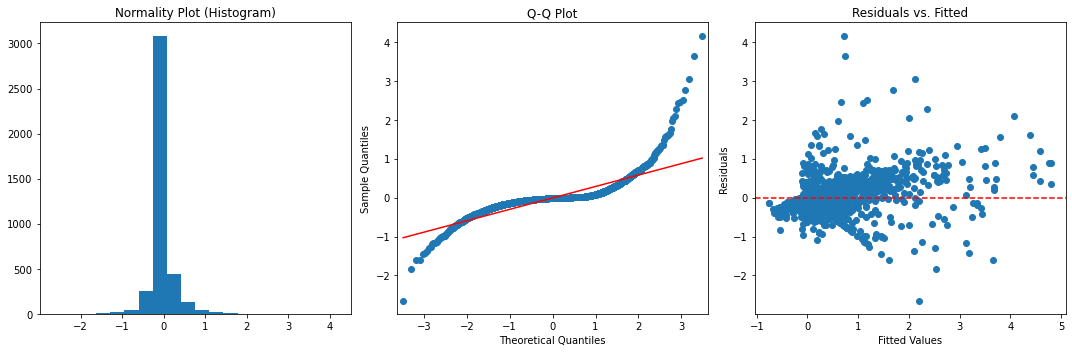

In [334]:
import statsmodels.api as sm
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Normality plot (histogram)
axes[0].hist(combined_stats['Residuals_RF'], bins=20)
axes[0].set_title('Normality Plot (Histogram)')

# Q-Q plot
sm.qqplot(combined_stats['Residuals_RF'], line='s', ax=axes[1])
axes[1].set_title('Q-Q Plot')

# Residuals vs. Fitted plot
axes[2].scatter(combined_stats['war_playoffs_rfpredicted'], combined_stats['Residuals_RF'])
axes[2].axhline(0, color='red', linestyle='--')
axes[2].set_xlabel('Fitted Values')
axes[2].set_ylabel('Residuals')
axes[2].set_title('Residuals vs. Fitted')

plt.tight_layout()
plt.show()

In [343]:
combined_stats['Residuals_ML'] = combined_stats['war_playoffs'] - combined_stats['war_playoffs_mlrpredicted']

In [346]:
combined_stats

,FULL_NAME,PLAYER_ID,SEASON,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,MIN,FG_PCT,FG3_PCT,...,DREBPG,STLPG,BLKPG,TOVPG,war_reg_season,war_playoffs,war_playoffs_mlrpredicted,war_playoffs_rfpredicted,Residuals_RF,Residuals_ML
0,Alex Abrines,203518,2017,1610612760,OKC,24.0,75,1134.0,0.395,0.380,...,1.173333,0.506667,0.106667,0.333333,1.447708,-0.198700,0.072839,-0.127594,-0.071106,-0.271540
1,Alex Abrines,203518,2018,1610612760,OKC,25.0,31,588.0,0.357,0.323,...,1.387097,0.548387,0.193548,0.451613,0.465912,0.311392,-0.014337,0.192320,0.119072,0.325730
2,Precious Achiuwa,1630173,2021,1610612761,TOR,22.0,73,1725.0,0.439,0.359,...,4.479452,0.506849,0.561644,1.150685,-0.246776,0.000721,-0.142388,0.008770,-0.008048,0.143109
3,Precious Achiuwa,1630173,2022,1610612761,TOR,23.0,55,1141.0,0.485,0.269,...,4.145455,0.563636,0.545455,1.072727,2.309611,-0.046953,0.166756,-0.001794,-0.045159,-0.213709
4,Quincy Acy,203112,2014,1610612752,NYK,24.0,68,1287.0,0.459,0.300,...,3.264706,0.397059,0.323529,0.882353,0.415918,0.000000,-0.044139,0.012497,-0.012497,0.044139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4054,Ivica Zubac,1627826,2018,0,TOT,22.0,59,1039.0,0.559,0.000,...,4.186441,0.237288,0.864407,1.186441,0.531968,0.000000,-0.010978,0.002181,-0.002181,0.010978
4055,Ivica Zubac,1627826,2019,1610612746,LAC,23.0,72,1326.0,0.613,0.000,...,4.805556,0.222222,0.916667,0.847222,1.114995,0.102138,0.038108,0.095505,0.006633,0.064031
4056,Ivica Zubac,1627826,2020,1610612746,LAC,24.0,72,1609.0,0.652,0.250,...,4.583333,0.333333,0.861111,1.125000,5.020903,1.203304,0.501210,0.599630,0.603674,0.702094
4057,Ivica Zubac,1627826,2021,1610612746,LAC,25.0,76,1852.0,0.626,0.000,...,5.618421,0.473684,1.013158,1.500000,3.704630,0.556697,0.367862,0.285210,0.271487,0.188835


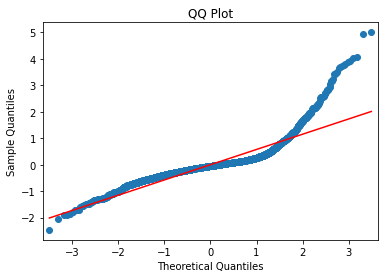

In [350]:

sm.qqplot(combined_stats['Residuals_ML'], line='s')
plt.title("QQ Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

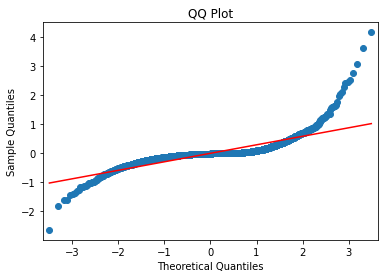

In [351]:
sm.qqplot(combined_stats['Residuals_RF'], line='s')
plt.title("QQ Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()